# Gaussian Mixture Model Clearly Explained
### _The only guide you need to learn everything about GMM_

When we talk about Gaussian Mixture Model (later, this will be denoted as GMM in this article), it's essential to know how the KMeans algorithm works. Because GMM is quite similar to the KMeans, more likely it's a probabilistic version of KMeans. This probabilistic feature allows GMM to be applied to many complex problems that KMeans can't fit into.

In summary, KMeans have below limitations,

1. It assumed that the clusters were spherical and equally sized, which is not valid in most real-world scenarios.
2. It's a hard clustering method. Meaning each data point is assigned to a single cluster.

Due to these limitations, we should know alternatives for KMeans when working on our machine learning projects. In this article, we will explore one of the best alternatives for KMeans clustering, called the Gaussian Mixture Model.

Throughout this article, we will be covering the below points.

1. How Gaussian Mixture Model (GMM) algorithm works — in plain English.
2. Mathematics behind GMM.
3. Implement GMM using Python from scratch.

## How Gaussian Mixture Model (GMM) algorithm works — in plain English


How Gaussian Mixture Model (GMM) algorithm works — in plain English
As I have mentioned earlier, we can call GMM probabilistic KMeans because the starting point and training process of the KMeans and GMM are the same. However, KMeans uses a distance-based approach, and GMM uses a probabilistic approach. There is one primary assumption in GMM: the dataset consists of multiple Gaussians, in other words, a mixture of the gaussian.

In [1]:
#import requred libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from scipy.stats import norm
import warnings
import random

warnings.filterwarnings('ignore')

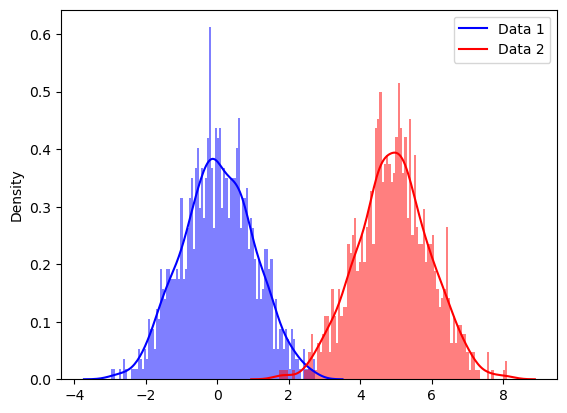

In [2]:
# Generate some data with multiple modes
data1 = np.random.normal(0, 1, 1000)
data2 = np.random.normal(5, 1, 1000)

# Plot the data using seaborn's distplot function
sns.distplot(data1, kde=True, hist=True, bins=100, color='b', hist_kws={'alpha': 0.5})
sns.distplot(data2, kde=True, hist=True, bins=100, color='r', hist_kws={'alpha': 0.5})

# Add a legend
plt.legend(['Data 1', 'Data 2'])

# Show the plot
plt.show()

The above kind of distribution is often called multi-model distribution. Each peak represents the different gaussian distribution or the cluster in our dataset. But the question is,

#### _how do we estimate these distributions?_

Before answering this question, let's create some gaussian distribution first. Please note here I am generating multivariate normal distribution; it's a higher dimensional extension of the univariate normal distribution.

Let's define the mean and covariance of our data points. Using mean and covariance, we can generate the distribution as follows.

In [3]:
# Set the mean and covariance
mean1 = [0, 0]
mean2 = [2, 0]
cov1 = [[1, .7], [.7, 1]]
cov2 = [[.5, .4], [.4, .5]]

# Generate data from the mean and covariance
data1 = np.random.multivariate_normal(mean1, cov1, size=1000)
data2 = np.random.multivariate_normal(mean2, cov2, size=1000)

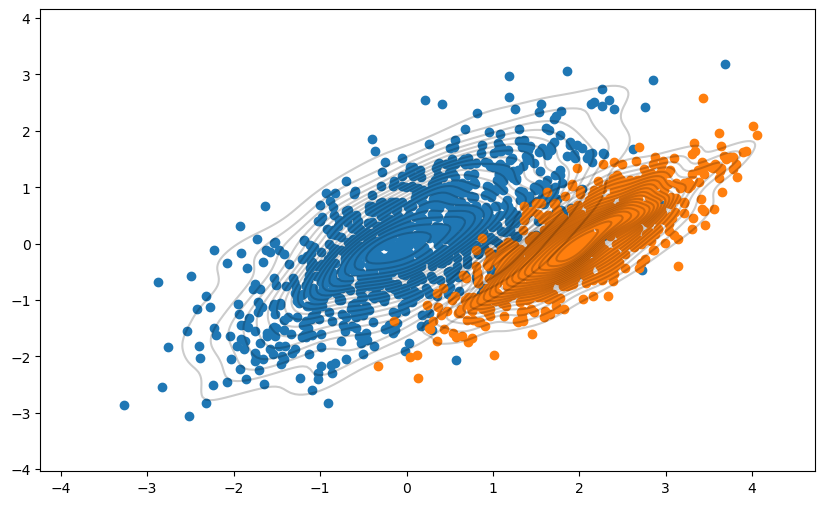

In [4]:
plt.figure(figsize=(10,6))

plt.scatter(data1[:,0],data1[:,1])
plt.scatter(data2[:,0],data2[:,1])

sns.kdeplot(data1[:, 0], data1[:, 1], levels=20, linewidth=10, color='k', alpha=0.2)
sns.kdeplot(data2[:, 0], data2[:, 1], levels=20, linewidth=10, color='k', alpha=0.2)

plt.grid(False)
plt.show()

As you can see here, we generated random gaussian distribution using mean and covariance matrices. What about reversing this process? That's what exactly GMM is doing. But how?

_Because, in the beginning, we didn’t have any insights about clusters nor their associated mean and covariance matrices_

Well, It happens according to the below steps,

1. Decide the number of clusters (to decide this, we can use domain knowledge or other methods such as BIC/AIC) for the given dataset. Assume that we have 1000 data points, and we set the number of groups as 2.
2. Initiate mean, covariance, and weight parameter per cluster. (we will explore more about this in a later section)
3. Use the Expectation Maximization algorithm to do the following,
 - Expectation Step (E step): Calculate the probability of each data point belonging to each data point, then evaluate the likelihood function using the current estimate for the parameters
 - Maximization step (M step): Update the previous mean, covariance, and weight parameters to maximize the expected likelihood found in the E step
 - Repeat these steps until the model converges.

With this information, I am concluding the no-math explanation of the GMM algorithm.

## Mathematics behind GMM

The core of GMM lies within Expectation Maximization(EM) algorithm described in the previous section.

Let's demonstrate the EM algorithm in the sense of GMM.

__Step 01: Initialize mean, covariance and weight parameters__

1. mean (μ): initialize randomly.
2. covariance (Σ): initialize randomly
3. weight (mixing coefficients) (π): fraction per class refers to the likelihood that a particular data point belongs to each class. In the beginning, this will be equal for all clusters. Assume that we fit a GMM with three components. In this case weight parameter might be set to 1/3 for each component, resulting in a probability distribution of (1/3, 1/3, 1/3).

__Step 02: Expectation Step (E step)__

For each data point 𝑥𝑖:
Calculate the probability that the data point belongs to cluster (𝑐) using the below equation. k is the number of distributions we are supposed to find.

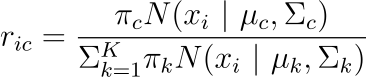

Where 𝜋_𝑐 is the mixing coefficient (sometimes called weight) for the Gaussian distribution c, which was initialized in the previous stage, and 𝑁(𝒙 | 𝝁,𝚺) describes the probability density function (PDF) of a Gaussian distribution with mean 𝜇 and covariance Σ with respect to data point x; We can denote it as below.

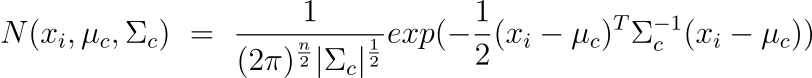

The E-step computes these probabilities using the current estimates of the model's parameters. These probabilities are typically referred to as the "responsibilities" of the Gaussian distributions. They are represented by the variables r_ic, where i is the index of the data point, and c is the index of the Gaussian distribution. The responsibility measures how much the c-th Gaussian distribution is responsible for generating the i-th data point. Conditional probability is used here, more specifically, Bayes theorem.

Let's take a simple example. Assume we have 100 data points and need to cluster them into two groups. We can write r_ic(i=20,c=1) as follows. Where i represents the data point's index, and c represents the index of the cluster we are considering.

Please note at the beginning, 𝜋_𝑐 initialized to equal for each cluster c = 1,2,3,..,k. In our case, 𝜋_1 = 𝜋_2 = 1/2.

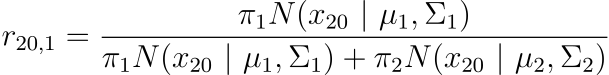

The result of the E-step is a set of responsibilities for each data point and each Gaussian distribution in the mixture model. These responsibilities are used in the M-step to update the estimates of the model's parameters.

__Step 03: Maximization Step (M step)__

In this step, the algorithm uses the responsibilities of the Gaussian distributions (computed in the E-step) to update the estimates of the model's parameters.

The M-step updates the estimates of the parameters as follows:

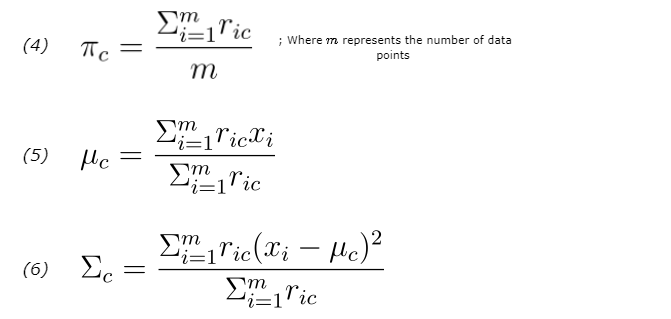

1. Update the πc (mixing coefficients) using equation 4 above.
2. Update the μc using equation number 5 above.

3. Then update the Σc using the 6th equation.

Additional Fact:

_πc can be considered equivalent to the fraction of points allocated to 𝑐 because numerator Σ_𝑖 *𝑟_𝑖𝑐 represents the likelihood of the data point belonging to the gaussian c. If we assume we have 3 clusters and 𝑖-th data point belongs to cluster 1, we can write the related vector as [0.97,0.02,0.01]. If we sum these vectors for each data point, the result vector is approximately equal to the number of data points per cluster._

This updated estimate is used in the next E-step to compute new responsibilities for the data points.

So on and so forth, this process will repeat until algorithm convergence, typically achieved when the model parameters do not change significantly from one iteration to the next.

Lots of ugly and complex equations, right? :)

### _Let’s summarize the above facts into one simple diagram,_

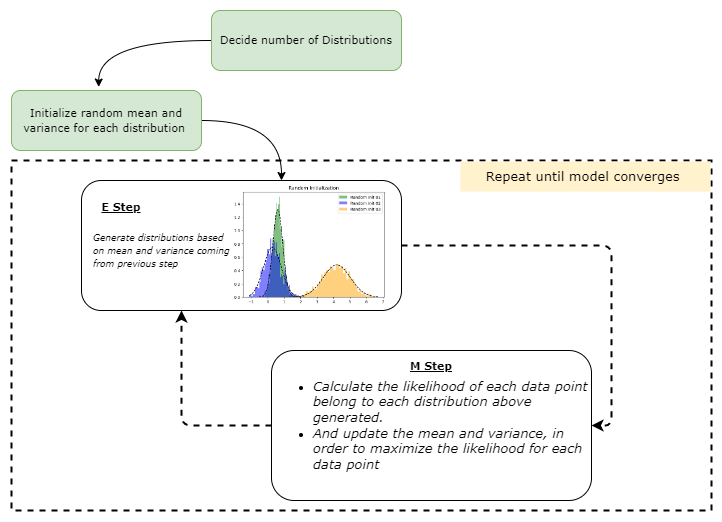

Don't worry; when it comes to coding, it will be one line per each equation. Let's start to implement GMM from scratch using Python.

## Implement GMM using Python from scratch.

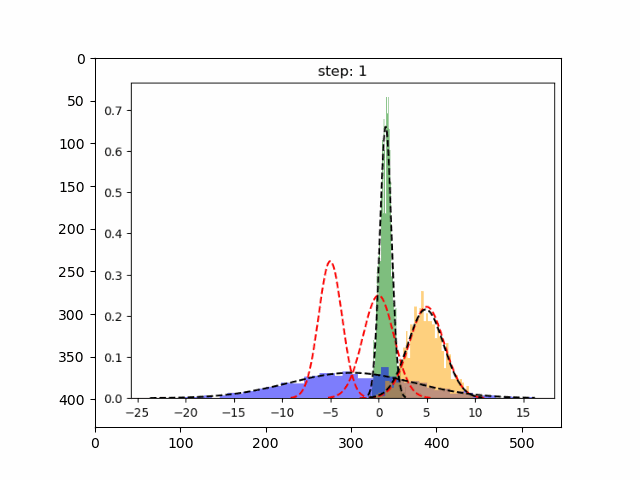

First thing first, let's create a fake dataset. In this section, I will implement GMM for the 1-D dataset.

In [7]:
n_samples = 100
mu1, sigma1 = -5, 1.2 
mu2, sigma2 = 5, 1.8 
mu3, sigma3 = 0, 1.6 

x1 = np.random.normal(loc = mu1, scale = np.sqrt(sigma1), size = n_samples)
x2 = np.random.normal(loc = mu2, scale = np.sqrt(sigma2), size = n_samples)
x3 = np.random.normal(loc = mu3, scale = np.sqrt(sigma3), size = n_samples)

X = np.concatenate((x1,x2,x3))

In [8]:
def plot_pdf(mu,sigma,label,alpha=0.5,linestyle='k--',density=True,color='green'):
    """
    Plot 1-D data and its PDF curve.

    Parameters
    ----------
    X : array-like, shape (n_samples,)
        The input data.
    """
    # Compute the mean and standard deviation of the data

    # Plot the data
    
    X = norm.rvs(mu, sigma, size=1000)
    
    plt.hist(X, bins=50, density=density, alpha=alpha,label=label,color=color)

    # Plot the PDF
    x = np.linspace(X.min(), X.max(), 1000)
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, linestyle)


And plot the generated data as follows. Please note that instead of plotting the data itself, I have plotted the probability density of each sample.

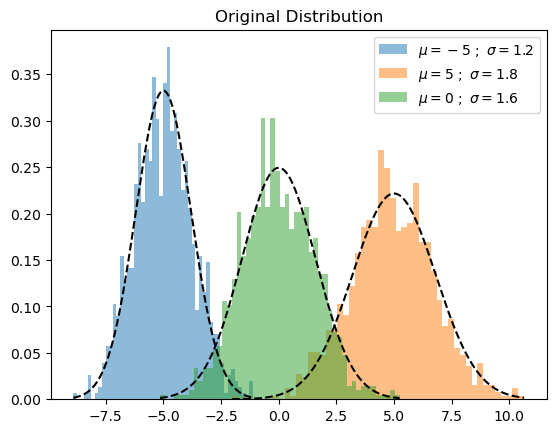

In [9]:
plot_pdf(mu1,sigma1,label=r"$\mu={} \ ; \ \sigma={}$".format(mu1,sigma1),color=None)
plot_pdf(mu2,sigma2,label=r"$\mu={} \ ; \ \sigma={}$".format(mu2,sigma2),color=None)
plot_pdf(mu3,sigma3,label=r"$\mu={} \ ; \ \sigma={}$".format(mu3,sigma3),color=None)
plt.title("Original Distribution")
plt.legend()
plt.show()

Let's build each step described in the previous section,

__Step 01: Initialize mean, covariance, and weights__

In [10]:
def random_init(n_compenents):
    
    """Initialize means, weights and variance randomly"""
    
    pi = np.ones((n_compenents)) / n_compenents
    means = np.random.choice(X, n_compenents)
    variances = np.random.random_sample(size=n_compenents)
    plot_pdf(means[0],variances[0],'Random Init 01',)
    plot_pdf(means[1],variances[1],'Random Init 02',color='blue')
    plot_pdf(means[2],variances[2],'Random Init 03',color='orange')
    
    plt.title("Random Initialization")
    
    plt.legend()
    plt.show()
    
    return means,variances,pi

__Step 02: Expectation Step (E step)__

In [11]:
def step_expectation(X,n_components,means,variances):
    """E Step
    
    Parameters
    ----------
    X : array-like, shape (n_samples,)
        The data.
    n_components : int
        The number of clusters
    means : array-like, shape (n_components,)
        The means of each mixture component.
    variances : array-like, shape (n_components,)
        The variances of each mixture component.
        
    Returns
    -------
    weights : array-like, shape (n_components,n_samples)
    """
    weights = np.zeros((n_components,len(X)))
    for j in range(n_components):
        weights[j,:] = norm(loc=means[j],scale=np.sqrt(variances[j])).pdf(X)
    return weights

After this function, we covered the first two equations we discussed in E Step. Here we have generated the gaussian distribution for the current model parameter means and variances. We accomplished that by using the scipy's stat module. After, we used the pdf method to calculate the likelihood of belonging to each data point for each cluster.

__Step 03: Maximization Step (M step)__

In [12]:
def step_maximization(X,weights,means,variances,n_compenents,pi):
    """M Step
    
    Parameters
    ----------
    X : array-like, shape (n_samples,)
        The data.
    weights : array-like, shape (n_components,n_samples)
        initilized weights array
    means : array-like, shape (n_components,)
        The means of each mixture component.
    variances : array-like, shape (n_components,)
        The variances of each mixture component.
    n_components : int
        The number of clusters
    pi: array-like (n_components,)
        mixture component weights
        
    Returns
    -------
    means : array-like, shape (n_components,)
        The means of each mixture component.
    variances : array-like, shape (n_components,)
        The variances of each mixture component.
    """
    r = []
    for j in range(n_compenents):  
        r.append((weights[j] * pi[j]) / (np.sum([weights[i] * pi[i] for i in range(n_compenents)], axis=0)))

        means[j] = np.sum(r[j] * X) / (np.sum(r[j]))
        variances[j] = np.sum(r[j] * np.square(X - means[j])) / (np.sum(r[j]))
    
        pi[j] = np.mean(r[j])

    return variances,means,pi

In [13]:
def plot_intermediate_steps(means,variances,density=False,save=False,file_name=None):
    
    plot_pdf(mu1,sigma1,alpha=0.0,linestyle='r--',label='Original Distibutions')
    plot_pdf(mu2,sigma2,alpha=0.0,linestyle='r--',label='Original Distibutions')
    plot_pdf(mu3,sigma3,alpha=0.0,linestyle='r--',label='Original Distibutions')
    
    color_gen = (x for x in ['green','blue','orange'])
    
    for mu,sigma in zip(means,variances):
        plot_pdf(mu,sigma,alpha=0.5,label='d',color=next(color_gen))
    if save or file_name is not None:
        step = file_name.split("_")[1]
        plt.title(f"step: {step}")
        plt.savefig(f"steps/{file_name}.png",bbox_inches='tight')
    plt.show()

Let's implement the training loop.

In [15]:
def train_gmm(data,n_compenents=3,n_steps=50, plot_intermediate_steps_flag=True):
    """ Training step of the GMM model
    
    Parameters
    ----------
    data : array-like, shape (n_samples,)
        The data.
    n_components : int
        The number of clusters
    n_steps: int
        number of iterations to run
    """
    
    
    means,variances,pi = random_init(n_compenents)
    for step in range(n_steps):
        weights = step_expectation(data,n_compenents,means,variances)
        variances,means,pi = step_maximization(X, weights, means, variances, n_compenents, pi)
        if plot_intermediate_steps_flag:plot_intermediate_steps(means,variances,)#file_name=f'step_{step+1}')
    plot_intermediate_steps(means,variances)

When we start the model training, we will do E and M steps according to the n_steps parameter we set.

But in the actual use cases, you will use the scikit-learn version of the GMM more often. There you can find additional parameters, such as

tol: defining the model’s stop criteria. EM iterations will stop when the lower bound average gain is below the tol parameter.

init_params: The method used to initialize the weights

You may refer to the documentation [here](https://scikitlearn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html.)

Alright, let's see how our handcrafted GMM performs.

In [20]:
# train_gmm(X,n_steps=30,plot_intermediate_steps_flag=True)

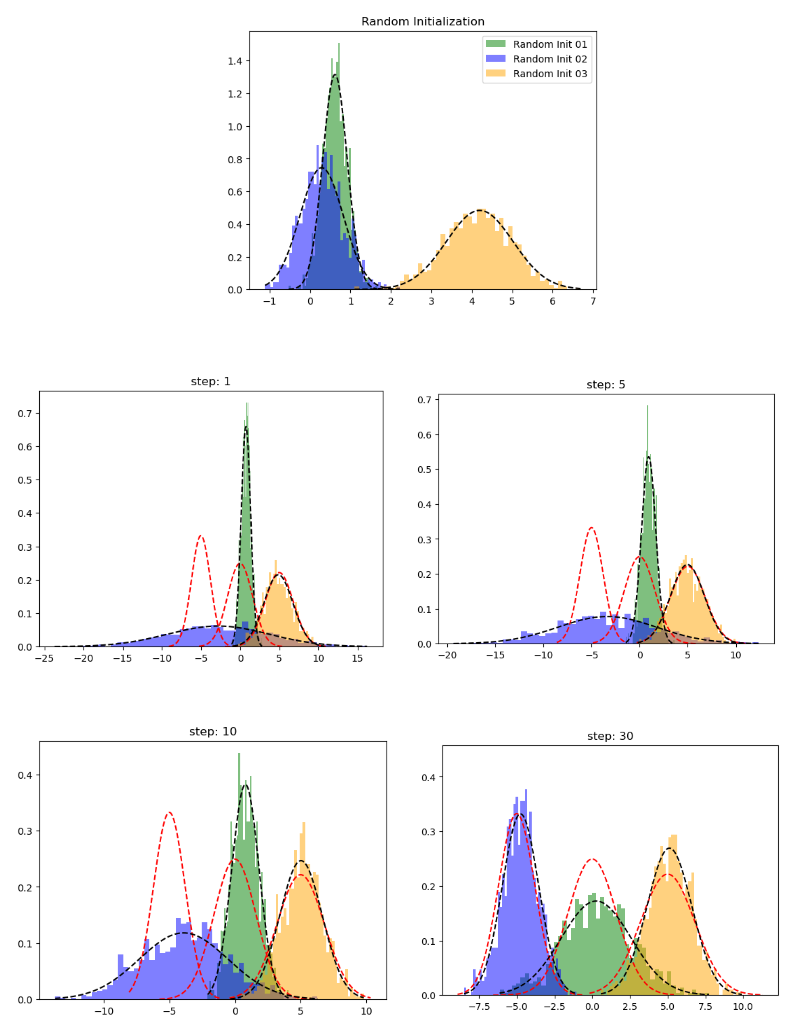

In the above diagrams, red dashed lines represent the original distribution, while other graphs represent the learned distributions. After the 30th iteration, we can see that our model performed well on this toy dataset.